In [1]:
import sys
sys.path.insert(0, '/das/work/p17/p17983/')

In [2]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm

[INFO][corrections] Numba not available, reverting to Numpy


Set up the filters.  "numstds" is the number of standard deviations to take from the median.

In [3]:
def get_Izero(filename, DIRBS):

    print(DIRBS + filename + ".BSREAD.h5")

    (_, _, IzeroFEL, _, _, _, pulse_ids, _, _, _ )\
        = load_PumpProbe_events_withTwoVariables(DIRBS + filename + ".BSREAD.h5", channel_energy, channel_BS_pulse_ids)
    return pulse_ids, IzeroFEL

In [4]:
filename_01 = "Ru_foil_monoscan_003_step0013"
DIRBS = "/sf/alvra/data/p17983/raw/scan_data/Ru_foil_monoscan_003/"
(Pulse_ids_01, IzeroFEL_01) = get_Izero(filename_01, DIRBS)


filename_02 = "jet_timing_005_step0013"
DIRBS = "/sf/alvra/data/p17983/raw/scan_data/jet_timing_005/"
(Pulse_ids_02, IzeroFEL_02) = get_Izero(filename_02, DIRBS)

/sf/alvra/data/p17983/raw/scan_data/Ru_foil_monoscan_003/Ru_foil_monoscan_003_step0013.BSREAD.h5
/sf/alvra/data/p17983/raw/scan_data/jet_timing_005/jet_timing_005_step0013.BSREAD.h5


In [5]:
Pulse_ids_01 = Pulse_ids_01-Pulse_ids_01[0]
Pulse_ids_02 = Pulse_ids_02-Pulse_ids_02[0]

In [6]:
dec_mean = 3
dec_std = 2

IzeroFEL_01_mean = np.round(np.mean(IzeroFEL_01),dec_mean)
IzeroFEL_01_std = np.round(np.std(IzeroFEL_01),dec_std)
IzeroFEL_02_mean = np.round(np.mean(IzeroFEL_02),dec_mean)
IzeroFEL_02_std = np.round(np.std(IzeroFEL_02),dec_std)

<IPython.core.display.Javascript object>


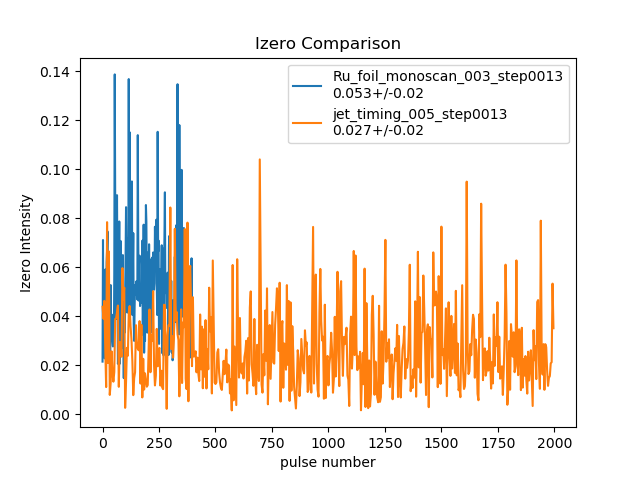

Text(0.5, 1.0, 'Izero Comparison')

In [7]:
plt.figure()
plt.plot(Pulse_ids_01,IzeroFEL_01, label = filename_01+"\n"+str(IzeroFEL_01_mean)+"+/-"+str(IzeroFEL_01_std))
plt.plot(Pulse_ids_02,IzeroFEL_02, label = filename_02+"\n"+str(IzeroFEL_02_mean)+"+/-"+str(IzeroFEL_02_std))
plt.legend()
plt.xlabel('pulse number')
plt.ylabel('Izero Intensity')
plt.title('Izero Comparison')